In [1]:
import sys
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [2]:
pred = pickle.load(open( "../predictions/dt-gridsearch-genetic-preds.p", "rb"))

pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1], dtype=int64)

In [7]:
def tsne_projection(X, y, perplexity):    
    print('- Projecting by tSNE')
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=2000)
    X = tsne.fit_transform(X)   

    Xf = X[y == 0]  # all projected samples with response = 0 (refractory)
    Xt = X[y == 1]  # all projected samples with response = 1 (responsive)
    
#     Xf_pred = Xf[pred == 0] 
#     Xt_pred = Xt[pred == 1]

    print('- Plotting projected feats')
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.set_title('t-SNE: perplexity=%d' % perplexity)
#     line1, = ax.plot(Xf[:,0], Xf[:,1], 'bo', linewidth=0.5, picker=5, label='Refractory')
#     line2, = ax.plot(Xt[:,0], Xt[:,1], 'ro', linewidth=0.5, picker=5, label='Responsive')
    line1, = ax.plot(Xf[:,0], Xf[:,1], 'bo', linewidth=0.5, picker=5, label='Refractory')
    line2, = ax.plot(Xt[:,0], Xt[:,1], 'yo', linewidth=0.5, picker=5, label='Responsive')
#     line3, = ax.plot(Xf_pred[:,0], Xf_pred[:,1], 'gv', linewidth=0.5, picker=5, label='Refractory')
#     line4, = ax.plot(Xt_pred[:,0], Xt_pred[:,1], 'rv', linewidth=0.5, picker=5, label='Responsive')
    plt.legend(handles=[line1, line2])
    plt.show()
    
    return X

- CSV: ..\..\data\preprocessed\preprocessed-article-genetic-data.csv
- Perplexity: 40
----------------------

- Projecting by tSNE
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 241 samples in 0.000s...
[t-SNE] Computed neighbors for 241 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 241 / 241
[t-SNE] Mean sigma: 2.605072
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.527153
[t-SNE] KL divergence after 1050 iterations: 0.862605
- Plotting projected feats


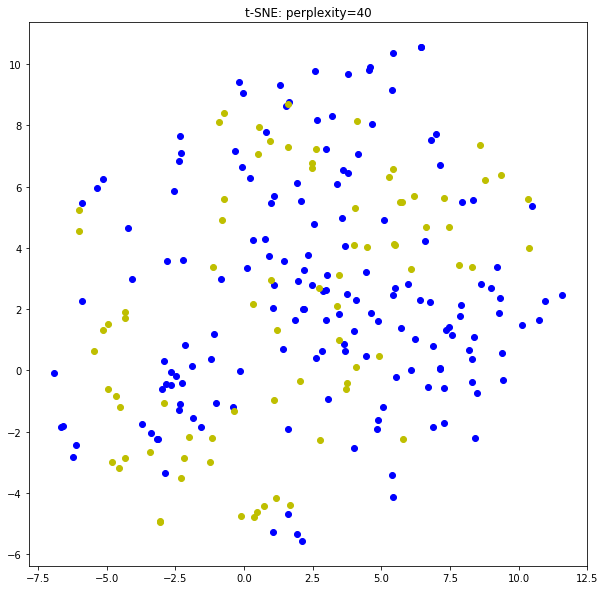

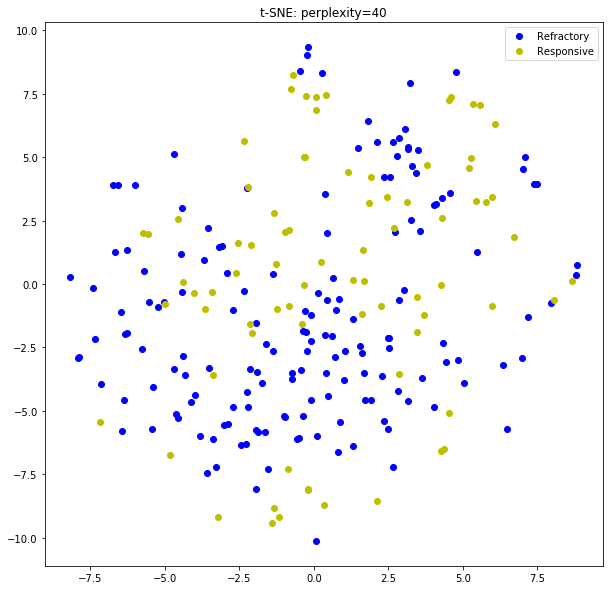

In [8]:
csv_path = '..\..\data\preprocessed\preprocessed-article-genetic-data.csv'
perplexity = 40

print("- CSV: %s" % csv_path)
print("- Perplexity: %d" % perplexity)
print("----------------------\n")

df = pd.read_csv(csv_path)
X = df.values[:, 1:]
y = df.values[:, 0]

X = tsne_projection(X, y, perplexity)

In [19]:
X[240,0]

4.2825394

In [11]:
Xf = X[y == 0]  # all projected samples with response = 0 (refractory)
Xt = X[y == 1]  # all projected samples with response = 1 (responsive)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [6]:
y == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [15]:
tsne2 = TSNE(n_components=1, verbose=1, perplexity=perplexity, n_iter=2000)
y2 = tsne2.fit_transform(y.reshape(-1, 1))

y2

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 241 samples in 0.000s...
[t-SNE] Computed neighbors for 241 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 241 / 241
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.009220
[t-SNE] KL divergence after 1400 iterations: -0.149681


array([[-28.357666  ],
       [-16.565557  ],
       [-18.307724  ],
       [-28.713928  ],
       [-16.565557  ],
       [-28.339287  ],
       [-29.146854  ],
       [-16.565557  ],
       [-26.906586  ],
       [-18.307724  ],
       [-17.495977  ],
       [-18.307724  ],
       [-28.745073  ],
       [-28.745073  ],
       [-29.146854  ],
       [-28.005653  ],
       [-16.565557  ],
       [-29.756353  ],
       [-26.906586  ],
       [-18.307724  ],
       [-18.307724  ],
       [-16.565557  ],
       [-29.756353  ],
       [-20.387827  ],
       [-27.62728   ],
       [-29.756353  ],
       [-27.62728   ],
       [-29.17441   ],
       [-16.565557  ],
       [-20.387827  ],
       [-18.307724  ],
       [-16.565557  ],
       [-27.62728   ],
       [-26.113512  ],
       [-17.495977  ],
       [-29.756353  ],
       [-29.145103  ],
       [-27.232237  ],
       [-28.36796   ],
       [-26.837807  ],
       [-26.837807  ],
       [-16.565557  ],
       [-26.113512  ],
       [-28

In [16]:
y2[y == 1]

array([], dtype=float32)